In [1]:
# Import packages and Libraries
import os
import numpy as np
import pandas as pd

# ML toolkits
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.utils.extmath import density
from sklearn.pipeline import make_pipeline

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fake = pd.read_csv('/content/drive/MyDrive/Colab Datasets/Fake_news_dataset.csv')
true = pd.read_csv('/content/drive/MyDrive/Colab Datasets/True_news_dataset.csv')
print (fake)
print(true)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...    

In [3]:
display(fake.head())
display(true.head())

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Now I shall perform the below on our dataset
* Data Exploration
* Data cleaning & Preparation
* Feature Extraction
* Model tesing & training

In [4]:
display(fake.info())
print('\n')
display(true.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


None

In [5]:
display(fake.subject.value_counts())
print('\n')
display(true.subject.value_counts())

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

### Data Cleaning & Preparation

It looks like the subject column is too informative - there are no overlapping "subjects" between fake and true news articles. Since we want to build a model that can differentiate fake and true news based on its content we will drop this column.

However, the best way to train the model on both fake and true news data will be to concatenate two kinds and shuffle them. We will add the labels to start with.

In [6]:
fake['label'] = 'fake'
true['label'] = 'real'

In [7]:
data = pd.concat([fake, true], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
data.drop('subject', axis=1)

,title,text,date,label
0,OOPS! MEDIA LIED…Transgender Surgery For Milit...,"Liz Harrington, a writer for the Washington Fr...","Jul 30, 2017",fake
1,BREAKING: FBI ARREST STOPS Horrific San Franci...,Truck attacks are becoming increasingly popula...,"Dec 23, 2017",fake
2,"Purge of Saudi princes, businessmen widens, tr...",RIYADH (Reuters) - A campaign of mass arrests ...,"November 6, 2017",real
3,Cambodia suspends cooperation with U.S. in fin...,PHNOM PENH (Reuters) - Cambodian Prime Ministe...,"September 14, 2017",real
4,Yale Psychiatrists Issue DIRE Warning Of The ...,Donald Trump is not fit to be president. Most ...,"April 22, 2017",fake
...,...,...,...,...
44893,‘ENABLING HILLARY’ Creates Insane Reason to Pr...,ENABLING HILLARY came to Senator Al Franken ...,"Nov 17, 2017",fake
44894,On The Anniversary Of The Berlin Wall Coming ...,Americans woke up on to a country that will so...,"November 9, 2016",fake
44895,FIDEL CASTRO MOCKS President Obama…Blasts Him ...,B..b b but what about the wave the baseball ga...,"Mar 28, 2016",fake
44896,U.S. House panel approves broad proposal on se...,WASHINGTON (Reuters) - A U.S. House panel on W...,"July 19, 2017",real


In [8]:
# Split the dataset to test and train
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.25)
display(X_train.head())
print('\n')
display(y_train.head())

print("\nThere are {} documents in the training data.".format(len(X_train)))

2672     Ivanka Trump really should stop talking about ...
35988    LONDON (Reuters) - British Foreign Secretary B...
15510    Trump can t pick good people to save his life....
18551    A judge just told us all what we ve known for ...
25141    Things started to fall apart faster than ever ...
Name: text, dtype: object

2672     fake
35988    real
15510    fake
18551    fake
25141    fake
Name: label, dtype: object


There are 33673 documents in the training data.


### Feature Extraction

Before getting into feature extraction, let's add some explanation to the method that was used.

Few common methods of extracting numerical features from text are tokenizing, counting occurrence and tf-idf term weighting. From thiswe will choose tf-idf term weighting as the feature to extract from these text.

- Term frequency
"tf" refers to the term frequency which indicates how often the terms can be found in documents. Tf's alone are often not sufficient as features as there are many commonly-used words such as "is", "are", "the", etc. which do not carry much information about the document hence, we do not want to take these terms as informative terms compared to others. These uninformative terms are actually referred to as stop words, and are often cleaned out during data cleaning/feature extraction as they do not hold much value in enhancing the model's ability to predict information.

- Inverse document frequency
"idf" is used to penalize common occurance terms across different contexts without adding any information. The equation for computing inverse document frequency is:
idf(t)=log1+n1+df(t)+1.
where n  represents the total number of documents,  t  represents the term in question,  df(t)  represents the document frequency of that term (the number of documents within the set of documents containing that term for common terms such as "is", "are", etc.).  idf(t)  will most likely be 1, since all documents are highly likely to contain them (df(t)=n). The less a term occurs across different documents, the smaller the denominator will be, making the fraction bigger and in turn, idf(t) is also bigger.

- Tf-idf
Finally, tf-idf is the product of term-frequency and inverse document frequency, mathematically computed as:
tf−idf(t,d)=tf(t,d)∗idf(t). 
Where  d  represents a document. The more commonly the word appears, the greater the value of tf will be, but if this is the case across different documents, it will be penalized with a small idf. On the other hand, a rarely-occurring word might have a smaller value of tf, but be highlighted by bigger idf values for not occurring often in different documents.

Let's now initialize a TfidfVectorizer object that takes an input of a set of document strings and outputs of the normalized tf-idf vectors. By using fit_transform, we can fit the vectorizer to data and tranform them. Also, there is an option to use the max_df to indicate the cut-off document-frequency for stop words. We shall also set the cut-off document-frequency to be 0.7, which is the lowest possible value that the parameter can take. The final output of fitting & transforming data will give a sparse matrix with the size of n_samples by n_features (number of documents by number of unique words).

In [9]:
my_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# fit the vectorizer and transform X_train into a tf-idf matrix then use the same vectorizer to transform X_test
tfidf_train = my_tfidf.fit_transform(X_train)
tfidf_test = my_tfidf.transform(X_test)

tfidf_train

<33673x108145 sparse matrix of type '<class 'numpy.float64'>'
	with 5140609 stored elements in Compressed Sparse Row format>

We could now see that there are as many rows as the number of documents and we have extracted over a hundred thousand features or tokens.

### Model training

The model used here is Passive-Aggressive (PA) Classifier, an algorithm that only updates its weights ("aggressive" action) when it encounters examples for which its predictions are wrong else remains unchanged ("passive" action).
Instantiate the PassiveAggressiveClassifier and train it with our features.

In [10]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_clf = PassiveAggressiveClassifier(max_iter=50)
pa_clf.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

The accuracy of prediction is 99.33%.

The F1 score is 0.993.



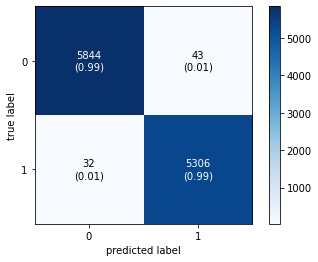

In [16]:
from mlxtend.plotting import plot_confusion_matrix
y_pred = pa_clf.predict(tfidf_test)

conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat,
                      show_normed=True, colorbar=True)

accscore = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test,y_pred,pos_label='real')

print('The accuracy of prediction is {:.2f}%.\n'.format(accscore*100))
print('The F1 score is {:.3f}.\n'.format(f1score))

In [17]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
print("Dimensionality (i.e., number of features): {:d}".format(pa_clf.coef_.shape[1]))
print("Density (i.e., fraction of non-zero elements): {:.3f}".format(density(pa_clf.coef_)))

Dimensionality (i.e., number of features): 108145
Density (i.e., fraction of non-zero elements): 0.513


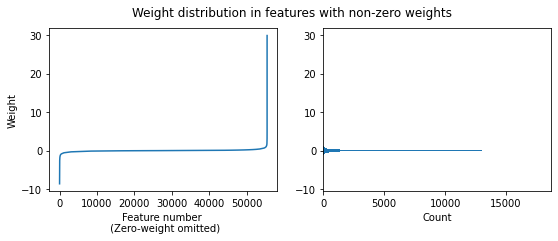

In [19]:
weights_nonzero = pa_clf.coef_[pa_clf.coef_!=0]
feature_sorter_nonzero = np.argsort(weights_nonzero)
weights_nonzero_sorted =weights_nonzero[feature_sorter_nonzero]

# Plot
fig, axs = plt.subplots(1,2, figsize=(9,3))

sns.lineplot(data=weights_nonzero_sorted, ax=axs[0])
axs[0].set_ylabel('Weight')
axs[0].set_xlabel('Feature number \n (Zero-weight omitted)')

axs[1].hist(weights_nonzero_sorted,
            orientation='horizontal', bins=500,)
axs[1].set_xlabel('Count')

fig.suptitle('Weight distribution in features with non-zero weights')

plt.show()

In [20]:
# Extracting "Indicator" Tokens and Sort features by their associated weights
tokens = my_tfidf.get_feature_names()
tokens_nonzero = np.array(tokens)[pa_clf.coef_[0]!=0]
tokens_nonzero_sorted = np.array(tokens_nonzero)[feature_sorter_nonzero]

num_tokens = 10
fake_indicator_tokens = tokens_nonzero_sorted[:num_tokens]
real_indicator_tokens = np.flip(tokens_nonzero_sorted[-num_tokens:])

fake_indicator = pd.DataFrame({
    'Token': fake_indicator_tokens,
    'Weight': weights_nonzero_sorted[:num_tokens]
})

real_indicator = pd.DataFrame({
    'Token': real_indicator_tokens,
    'Weight': np.flip(weights_nonzero_sorted[-num_tokens:])
})

print('The top {} tokens likely to appear in fake news were the following: \n'.format(num_tokens))
display(fake_indicator)

print('\n\n...and the top {} tokens likely to appear in real news were the following: \n'.format(num_tokens))
display(real_indicator)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The top 10 tokens likely to appear in fake news were the following: 



,Token,Weight
0,read,-8.600204
1,featured,-7.370329
2,image,-6.828612
3,getty,-5.398513
4,just,-5.189709
5,gop,-5.147096
6,com,-5.086471
7,sen,-4.181962
8,hillary,-4.129318
9,mr,-3.883633




...and the top 10 tokens likely to appear in real news were the following: 



,Token,Weight
0,reuters,29.847715
1,nov,5.069954
2,washington,4.758469
3,wednesday,4.036442
4,tuesday,3.961583
5,thursday,3.879948
6,republican,3.744868
7,friday,3.185755
8,saying,3.164054
9,statement,3.070280


In [22]:
fake_contain_fake = fake.text.loc[[np.any([token in body for token in fake_indicator.Token])
                                for body in fake.text.str.lower()]]
real_contain_real = true.text.loc[[np.any([token in body for token in real_indicator.Token])
                                for body in true.text.str.lower()]]

print('Articles that contained any of the matching indicator tokens:\n')

print('FAKE: {} out of {} ({:.2f}%)'
      .format(len(fake_contain_fake), len(fake), len(fake_contain_fake)/len(fake) * 100))
print(fake_contain_fake)

print('\nREAL: {} out of {} ({:.2f}%)'
      .format(len(real_contain_real), len(true), len(real_contain_real)/len(true) * 100))
print(real_contain_real)

Articles that contained any of the matching indicator tokens:

FAKE: 21739 out of 23481 (92.58%)
0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
23476    21st Century Wire says As 21WIRE reported earl...
23477    21st Century Wire says It s a familiar theme. ...
23478    Patrick Henningsen  21st Century WireRemember ...
23479    21st Century Wire says Al Jazeera America will...
23480    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 21739, dtype: object

REAL: 21409 out of 21417 (99.96%)
0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3

In [31]:
# Algorithm "Generalizability"
def FakeNewsDetection(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # vectorizer
    my_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
    tfidf_train = my_tfidf.fit_transform(X_train)
    tfidf_test = my_tfidf.transform(X_test)
    
    # model
    my_pac = PassiveAggressiveClassifier(max_iter=50)
    my_pac.fit(tfidf_train, y_train)
    y_pred = my_pac.predict(tfidf_test)
    
    # metrics
    conf_mat = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat,
                          show_normed=True, colorbar=True)
    
    accscore = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test,y_pred,pos_label='real')

    print('The accuracy of prediction is {:.2f}%.\n'.format(accscore*100))
    print('The F1 score is {:.3f}.\n'.format(f1score))

# Sort non-zero weights
    weights_nonzero = my_pac.coef_[my_pac.coef_!=0]
    feature_sorter_nonzero = np.argsort(weights_nonzero)
    weights_nonzero_sorted =weights_nonzero[feature_sorter_nonzero]
    
# Sort features by their associated weights
    tokens = my_tfidf.get_feature_names()
    tokens_nonzero = np.array(tokens)[my_pac.coef_[0]!=0]
    tokens_nonzero_sorted = np.array(tokens_nonzero)[feature_sorter_nonzero]

    num_tokens = 10
    fake_indicator_tokens = tokens_nonzero_sorted[:num_tokens]
    real_indicator_tokens = np.flip(tokens_nonzero_sorted[-num_tokens:])

    fake_indicator = pd.DataFrame({
        'Token': fake_indicator_tokens,
        'Weight': weights_nonzero_sorted[:num_tokens]
    })

    real_indicator = pd.DataFrame({
        'Token': real_indicator_tokens,
        'Weight': np.flip(weights_nonzero_sorted[-num_tokens:])
    })

    print('The top {} tokens likely to appear in fake news were the following: \n'.format(num_tokens))
    display(fake_indicator)

    print('\n\n...and the top {} tokens likely to appear in real news were the following: \n'.format(num_tokens))
    display(real_indicator)

In [32]:
# Generate a copy of the "real news" dataset and remove headings f

real_copy = true.copy()
for i,body in true.text.items():
    if '(reuters)' in body.lower():
        idx = body.lower().index('(reuters)') + len('(reuters) - ')
        real_copy.text.iloc[i] = body[idx:]
        
real_copy.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",real


The accuracy of prediction is 98.56%.

The F1 score is 0.985.



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The top 10 tokens likely to appear in fake news were the following: 



,Token,Weight
0,read,-10.423659
1,featured,-10.194208
2,image,-8.712949
3,gop,-8.126979
4,getty,-7.275565
5,com,-6.494779
6,just,-6.140410
7,sen,-5.816427
8,rep,-5.726619
9,watch,-5.406168




...and the top 10 tokens likely to appear in real news were the following: 



,Token,Weight
0,tuesday,7.690659
1,thursday,7.453312
2,wednesday,7.401310
3,nov,6.566586
4,friday,6.142786
5,reuters,5.592416
6,monday,5.317622
7,republican,5.101394
8,donald,4.379462
9,statement,4.372892


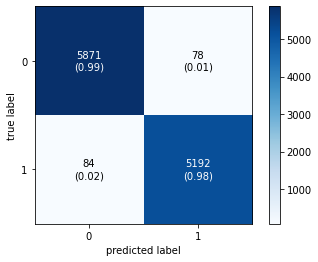

In [33]:
# Create new data, and run the algorithm
data2 = pd.concat([fake, real_copy], axis=0)
data2 = data2.sample(frac=1).reset_index(drop=True)
data2.drop('subject', axis=1)

FakeNewsDetection(data2['text'], data2['label'])